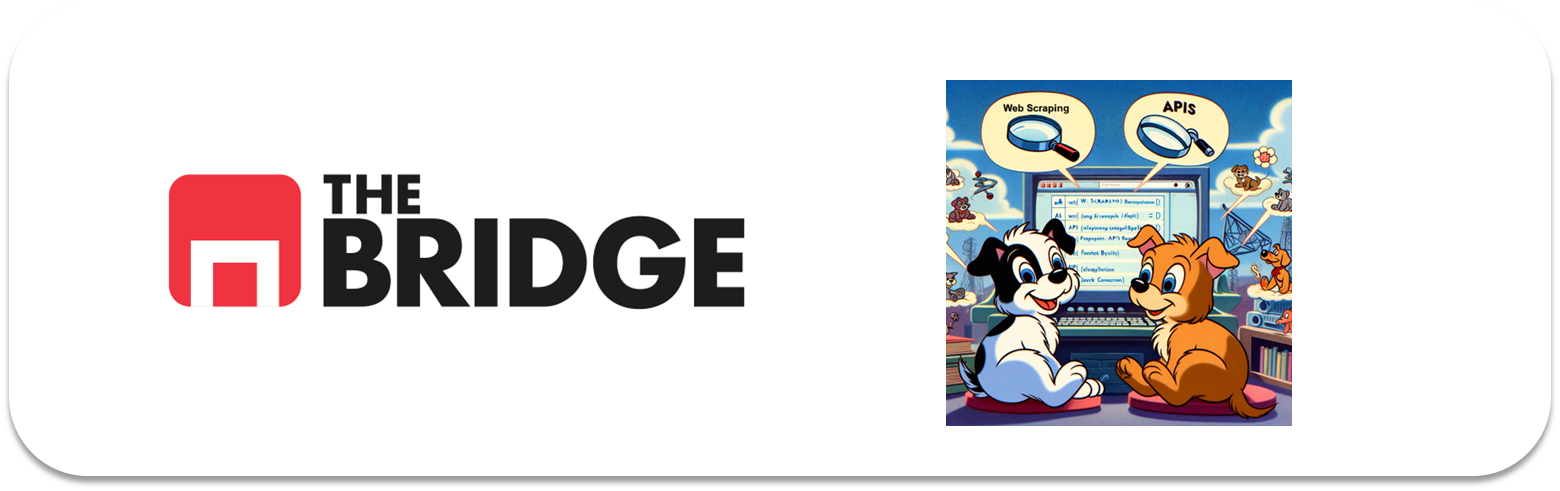

## Análisis turístico Canarias

## Objetivo

Explorar y analizar las tendencias turísticas en Canarias (foco en las llegadas internacionales y nacionales) desde el inicio de la pandemia (2020) hasta la actualidad (2023).
Identificar patrones de recuperación, estacionalidad y diferencias por país de origen (España, Alemania, Reino Unido).
Comparar las tendencias post-pandemia con años anteriores (si hay datos pre-pandemia disponibles).

## Preguntas a responder

¿Cómo afectó la pandemia al turismo en Canarias?
Análisis de la caída en llegadas durante 2020.
Comparación con el periodo pre-pandemia.
¿Cómo se ha recuperado el turismo?
Tendencias en las llegadas desde 2021.
Velocidad de recuperación para los principales mercados emisores: España, Alemania y Reino Unido.
¿Se han alterado patrones de estacionalidad?
Cambios en la distribución de pasajeros a lo largo del año.
Análisis de meses pico.
¿Qué islas lideran la recuperación?
Comparación entre Gran Canaria, Tenerife y otras islas.

## Fuente de datos
ISTAC


## Empezamos
A continuación, un código básico para conectarte a la API de Twitter y buscar tweets relacionados con el habla canaria:

In [60]:
import requests
import pandas as pd

Previsualización de los datos

In [61]:
# Cargar el archivo
file_path = "./data/datos_turismo_canarias.xlsx"
data = pd.read_excel(file_path)
# Ver las primeras filas para identificar encabezados útiles
print(data.head())

     Fecha  Canarias  España (excluida Canarias)  Alemania  Reino Unido
0  10/2024    274474                      353199    138912       179806
1  09/2024    261951                      345026    107873       174806
2  08/2024    270553                      393081    101548       189428
3  06/2024    276808                      348641     98571       175655
4  05/2024    271772                      345906     99986       170297


Limpieza de datos

In [62]:
# Asegurarse de que la columna 'Fecha' esté en formato datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%m/%Y')

# Crear columnas de mes y año
data['Mes'] = data['Fecha'].dt.strftime('%m')
data['Año'] = data['Fecha'].dt.strftime('%Y')

# Mostrar las primeras filas para comprobar el resultado
print(data.head())

       Fecha  Canarias  España (excluida Canarias)  Alemania  Reino Unido Mes  \
0 2024-10-01    274474                      353199    138912       179806  10   
1 2024-09-01    261951                      345026    107873       174806  09   
2 2024-08-01    270553                      393081    101548       189428  08   
3 2024-06-01    276808                      348641     98571       175655  06   
4 2024-05-01    271772                      345906     99986       170297  05   

    Año  
0  2024  
1  2024  
2  2024  
3  2024  
4  2024  


## Análisis de Tendencias
Podemos graficar la evolución de los pasajeros por cada país de origen a lo largo del tiempo (usando las columnas de Canarias, España (excluida Canarias), Alemania, Reino Unido).

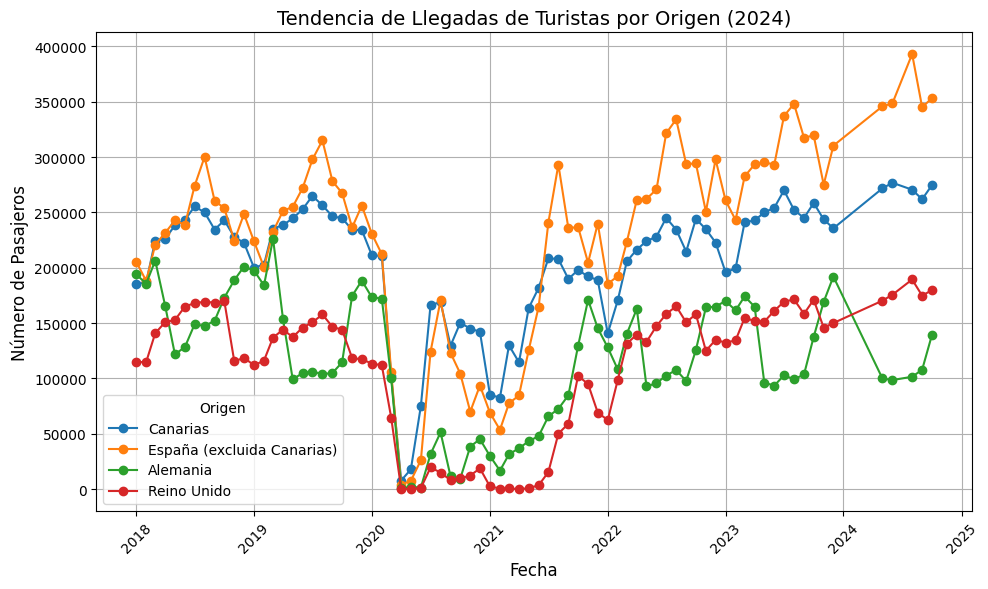

In [63]:
import matplotlib.pyplot as plt

# Graficar las tendencias de llegadas de turistas
plt.figure(figsize=(10,6))
plt.plot(data['Fecha'], data['Canarias'], label='Canarias', marker='o')
plt.plot(data['Fecha'], data['España (excluida Canarias)'], label='España (excluida Canarias)', marker='o')
plt.plot(data['Fecha'], data['Alemania'], label='Alemania', marker='o')
plt.plot(data['Fecha'], data['Reino Unido'], label='Reino Unido', marker='o')

# Agregar etiquetas y título
plt.title('Tendencia de Llegadas de Turistas por Origen (2024)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.legend(title='Origen')

# Mostrar gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparación Post-Pandemia
Si tienes datos de 2019 o de años anteriores, puedes hacer una comparación más específica entre el número de pasajeros antes y después de la pandemia (2020-2023). Si solo tienes datos recientes, aún podemos comparar la variación mes a mes o por año.

Comparación de la recuperación de turistas (comparación entre 2023 y 2024):

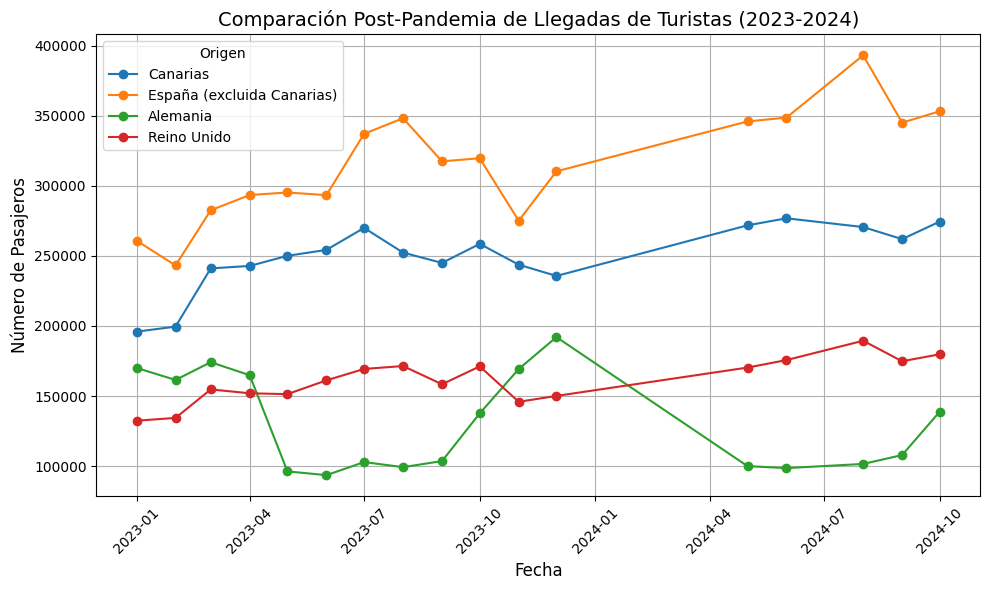

In [64]:
# Filtrar los datos para los años relevantes (2023-2024)
data_filtered = data[data['Fecha'].dt.year >= 2023]

# Graficar la comparación
plt.figure(figsize=(10,6))
plt.plot(data_filtered['Fecha'], data_filtered['Canarias'], label='Canarias', marker='o')
plt.plot(data_filtered['Fecha'], data_filtered['España (excluida Canarias)'], label='España (excluida Canarias)', marker='o')
plt.plot(data_filtered['Fecha'], data_filtered['Alemania'], label='Alemania', marker='o')
plt.plot(data_filtered['Fecha'], data_filtered['Reino Unido'], label='Reino Unido', marker='o')

# Títulos y etiquetas
plt.title('Comparación Post-Pandemia de Llegadas de Turistas (2023-2024)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Pasajeros', fontsize=12)
plt.legend(title='Origen')

# Mostrar gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

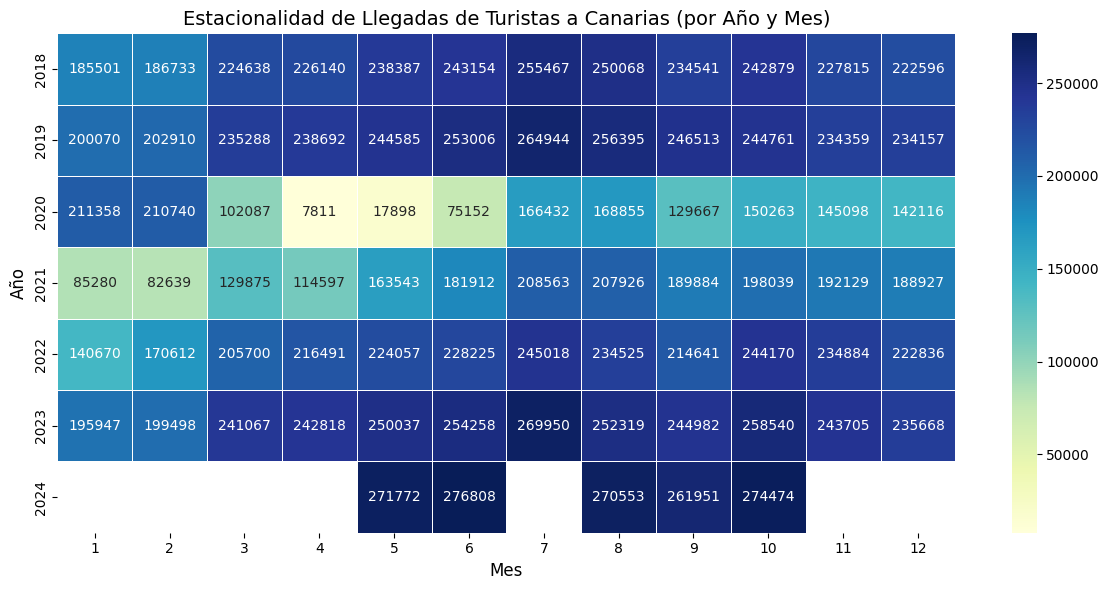

In [72]:
import seaborn as sns

# Convertir la columna 'Fecha' en formato datetime si es necesario
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%m/%Y')

# Extraer el mes y el año
data['Mes'] = data['Fecha'].dt.month
data['Año'] = data['Fecha'].dt.year

# Crear una tabla pivote de los datos
pivot_data = data.pivot_table(values='Canarias', index='Año', columns='Mes', aggfunc='sum')

# Crear un heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)

# Títulos y etiquetas
plt.title('Estacionalidad de Llegadas de Turistas a Canarias (por Año y Mes)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()